In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Notes

* `concat()`: Combine DataFrames by rows (axis = 0) or columns (axis=1). 
* Sticks the DataFrames together without using any keys. 

## Examples
### Example 1

This is a simple DataFrame with two job postings data. The first is from January the second is from February. We'll use `concat()` to concatenate these two DataFrames. 

In [2]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    "job_id" : [1,2,3,4,5],
    "job_title" : ["Data Scientist", "Data Analyst", "Machine Learning Engineer", "Data Scientist", "Data Engineer"],
    "company" : ["Company A", "Company B", "Company C", "Company D", "Company E"],
    "job_posted_date" : pd.to_datetime(["2024-01-02", "2024-01-07", "2024-01-14", "2024-01-19", "2024-01-24"])
})
job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [3]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    "job_id" : [6,7,8,9,10],
    "job_title" : ["Data Scientist", "Data Analyst", "Machine Learning Engineer", "Data Scientist", "Data Engineer"],
    "company" : ["Company F", "Company G", "Company H", "Company I", "Company J"],
    "job_posted_date" : pd.to_datetime(["2024-02-05", "2024-02-09", "2024-02-12", "2024-02-18", "2024-02-22"])
})
job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [4]:
# Concatenate the two DataFrames
job_postings_combined = pd.concat([job_postings_jan, job_postings_feb])
job_postings_combined

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [6]:
job_postings_combined = pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)
job_postings_combined

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


### Example 2

Now looking at our dataset. Similarly to the last section, let's filter for Data Analysts and then create a column for the month. Then we'll filter for March and April job postings and concatenate these two.

**Note**: This problem is only for demonstration purposes it's not very useful right now.

#### Steps

In [ ]:
# 1. Create a column for month.

df["job_posted_month"] = df["job_posted_date"].dt.strftime("%B") # %B full month name but %b showing some words 

In [43]:
# 2. Create dataframes for each month.

# make data frame for each month using a loop
months = df['job_posted_month'].unique()

# write this with dict comprehension
dict_months = {month: df[df['job_posted_month'] == month] for month in months}

# long way
# dict_months = {}
# for month in months:
#     dict_months[month] = df[df['job_posted_month'] == month]

type(dict_months)

#dict_months
dict_months["January"]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",January
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",January
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",January
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",January
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",January
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,January


In [31]:
# 3. Concatenate the first quarter.
quarter_1 = [dict_months["January"], dict_months["February"], dict_months["March"]]

df_q1 = pd.concat(quarter_1, ignore_index=True)
df_q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",January
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",January
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",January
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",March
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",March
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",March
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",March


In [ ]:
# 3. Concatenate the first quarter.
quarter_1 = [dict_months["January"], dict_months["February"], dict_months["March"]]

df_q1 = pd.concat(quarter_1, keys = ["Jan", "Feb", "Marc"])
df_q1

job_title_short  \
Jan  1            Data Analyst   
     20         Data Scientist   
     39          Data Engineer   
     53          Data Engineer   
     55         Data Scientist   
...                        ...   
Marc 785736  Software Engineer   
     785737       Data Analyst   
     785738   Business Analyst   
     785739      Data Engineer   
     785740  Software Engineer   

                                                     job_title  \
Jan  1                                            Data Analyst   
     20                                         Data Scientist   
     39                                          Data Engineer   
     53                                          Data Engineer   
     55                                         Data Scientist   
...                                                        ...   
Marc 785736                                    DevOps Engineer   
     785737                                   CRM Data Analyst   
     785738                     Commercial Analyst - Start Now   
     785739  Principal Associate, Data Engineer (Remote-Eli...   
     785740                                 AWS System Analyst   

                                      job_location                    job_via  \
Jan  1                Guadalajara, Jalisco, Mexico           via BeBee México   
     20                          Zaventem, Belgium         via BeBee Belgique   
     39                             Fort Worth, TX               via LinkedIn   
     53                              San Mateo, CA               via LinkedIn   
     55      São Paulo, State of São Paulo, Brazil                  via BeBee   
...                                            ...                        ...   
Marc 785736                              Singapura        melalui Trabajo.org   
     785737                     Bad Rodach, Jerman  melalui BeBee Deutschland   
     785738                               Malaysia           melalui Ricebowl   
     785739    Newark, New Jersey, Amerika Serikat        melalui Recruit.net   
     785740                                  India             melalui Trigyn   

            job_schedule_type  job_work_from_home            search_location  \
Jan  1              Full-time               False                     Mexico   
     20             Full-time               False                    Belgium   
     39             Full-time               False       Texas, United States   
     53             Full-time               False  California, United States   
     55             Full-time               False                     Brazil   
...                       ...                 ...                        ...   
Marc 785736   Pekerjaan tetap               False                  Singapore   
     785737   Pekerjaan tetap               False                    Germany   
     785738   Pekerjaan tetap               False                   Malaysia   
     785739   Pekerjaan tetap               False                      Sudan   
     785740   Pekerjaan tetap               False                      India   

                job_posted_date  job_no_degree_mention  job_health_insurance  \
Jan  1      2023-01-14 13:18:07                  False                 False   
     20     2023-01-31 13:53:38                  False                 False   
     39     2023-01-25 13:24:01                  False                 False   
     53     2023-01-28 13:07:30                  False                  True   
     55     2023-01-03 23:02:27                  False                 False   
...                         ...                    ...                   ...   
Marc 785736 2023-03-13 06:16:16                  False                 False   
     785737 2023-03-12 06:18:18                  False                 False   
     785738 2023-03-12 06:32:36                  False                 False   
     785739 2023-03-12 06:32:15                  False                 False   

In [39]:
df_q1.loc["Jan"]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",January
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",January
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",January
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",January
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",January
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,January


<Axes: xlabel='job_posted_month'>

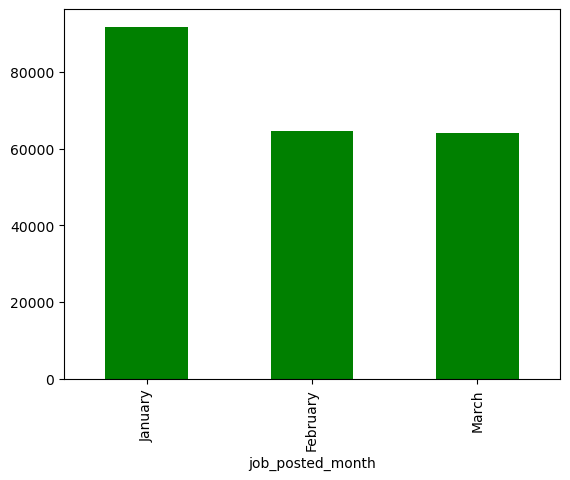

In [46]:
# 4. Inspecting to confirm.

df_q1["job_posted_month"].value_counts().plot(kind="bar", color="green")

###   📌 pd.concat() – Kısaca Nedir?

1. Birden fazla DataFrame veya Series'i birleştirmek için kullanılır.
2. Tıpkı parçaları üst üste (satır bazlı) veya yan yana (sütun bazlı) eklemek gibidir.
3. merge() gibi eşleştirme yapmaz; sadece yapıştırır.

### 📌 concat() Temel Parametreler
| Parametre        | Açıklama                                                      |
|------------------|---------------------------------------------------------------|
| objs             | Birleştirilecek DataFrame veya Series listesi (örn: [df1, df2])|
| axis             | 0: satır bazlı (alt alta), 1: sütun bazlı (yan yana)          |
| ignore_index     | True ise index'leri sıfırlar (0,1,2,...)                       |
| keys             | Grupları çok seviyeli index ile ayırır                        |
| join             | 'outer' (varsayılan): tüm sütunları alır, 'inner': ortakları alır |

### 🔁 concat() vs merge() Karşılaştırması
| Özellik      | concat()                                  | merge()                                         |
|--------------|--------------------------------------------|-------------------------------------------------|
| Mantık       | DataFrame'leri yapıştırır                 | Ortak kolona göre eşleştirerek birleştirir      |
| Eşleştirme   | Yok (sadece sıraya göre birleştirir)       | Ortak sütun(lar) ile eşleştirme yapılır (JOIN) |
| Kullanım     | Parça verileri üst üste veya yan yana ekler| İlişkili verileri bütünleştirir                |
| axis Param.  | axis=0 (satır), axis=1 (sütun)             | axis yok, how='inner', 'left', 'right' gibi JOIN türleri kullanılır |


1. Satır Bazlı Birleştirme
* pd.concat([df1, df2], axis=0, ignore_index=True)

2. Sütun Bazlı Birleştirme
* pd.concat([df1, df2], axis=1)
